In [7]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 7.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 7.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.7 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 9.8 MB/s eta 0:00:01
   -------------------------

In [19]:
pip install streamlit pandas numpy scikit-learn matplotlib seaborn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 7.5 MB/s eta 0:00:01
   ------------------- -------------------- 4.2/8.7 MB 8.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 7.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.1 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.5 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.5 MB 10.5 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/38.5 MB 9.9 MB/s 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle

In [30]:
import pandas as pd

# Full path to your CSV
df = pd.read_csv(r"D:\HORIZON\3 YEAR\2 SEMESTER\Intelligent Systems\Streamlit Assignment\data\academicStress.csv")

print(df.shape)
print(df.info())


(121, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            121 non-null    object
 1   Your Academic Stage                                                  121 non-null    object
 2   Peer pressure                                                        121 non-null    int64 
 3   Academic pressure from your home                                     121 non-null    int64 
 4   Study Environment                                                    121 non-null    object
 5   What coping strategy you use as a student?                           121 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  121 non-null    object
 7   What woul

Missing Values:
 Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64


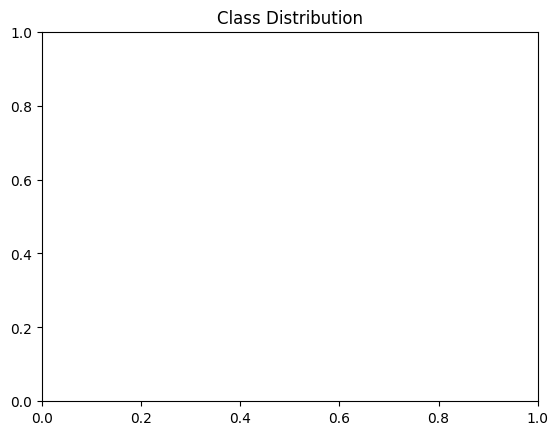

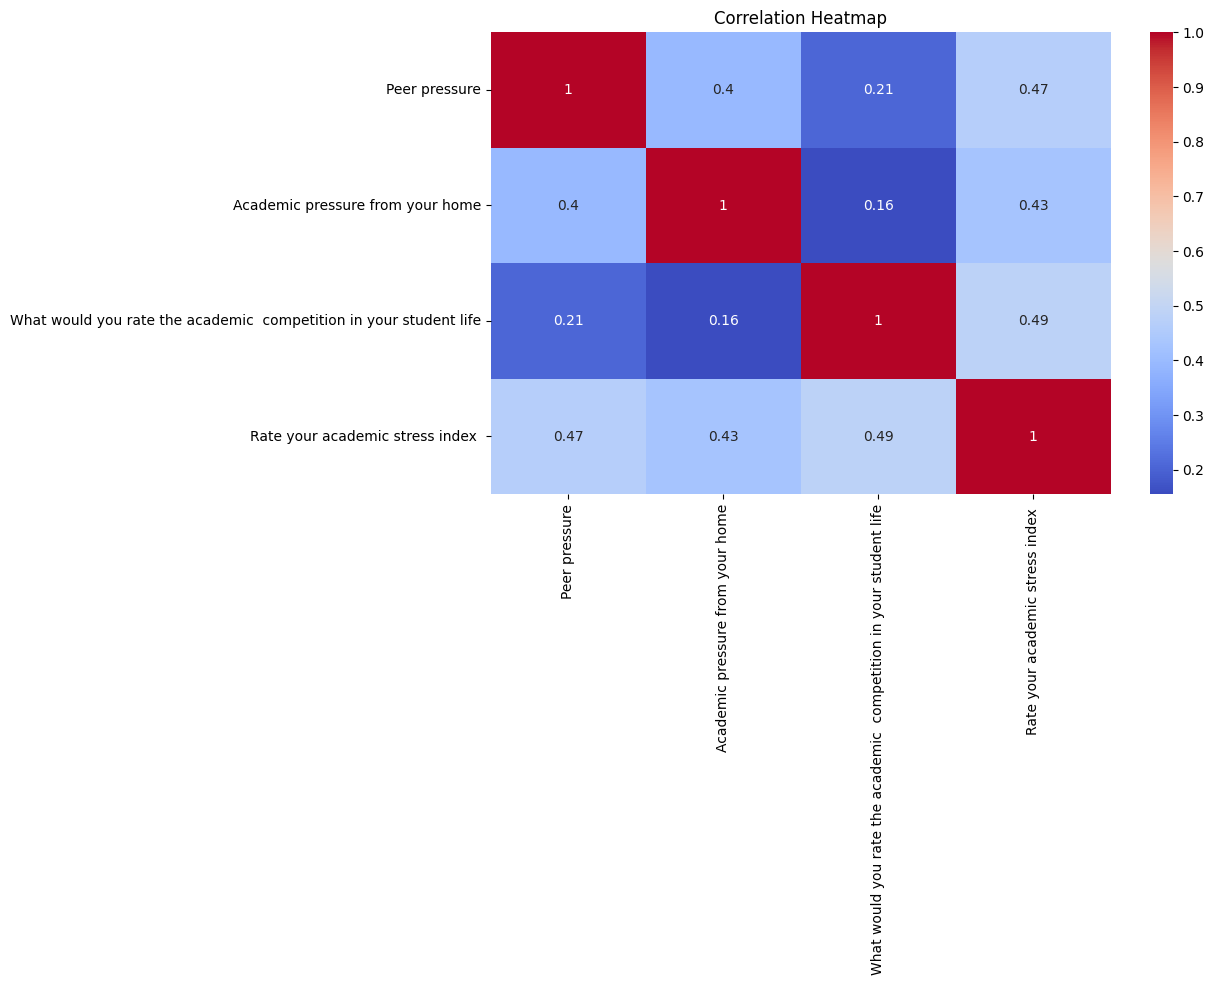

In [31]:
print("Missing Values:\n", df.isnull().sum())

plt.title('Class Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25304\1842323058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25304\1842323058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [33]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [34]:
X = df.drop('Rate your academic stress index ', axis=1)  # use correct column name with trailing space
y = df['Rate your academic stress index '] # use correct column name with trailing space

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (96, 8)
Shape of X_test: (25, 8)
Shape of y_train: (96,)
Shape of y_test: (25,)


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_check = pd.read_csv(r'D:\HORIZON\3 YEAR\2 SEMESTER\Intelligent Systems\Streamlit Assignment\data\academicStress.csv')


le = LabelEncoder()
for col in df_check.select_dtypes(include='object').columns:
    df_check[col] = le.fit_transform(df_check[col])

print("Columns after Label Encoding:")
print(df_check.columns)

Columns after Label Encoding:
Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')


In [40]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }

results = {
    'Logistic Regression': evaluate_model(y_test, y_pred_lr),
    'Random Forest': evaluate_model(y_test, y_pred_rf)
}

print(results)

{'Logistic Regression': {'accuracy': 0.28, 'precision': 0.285, 'recall': 0.28, 'f1': 0.2605128205128205}, 'Random Forest': {'accuracy': 0.4, 'precision': 0.44, 'recall': 0.4, 'f1': 0.3781818181818181}}


c:\Users\ASUS\anaconda3\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\anaconda3\envs\aif_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [42]:
best_model = rf if results['Random Forest']['accuracy'] > results['Logistic Regression']['accuracy'] else log_reg

# Save model & scaler
with open('../model.pkl', 'wb') as f:
    pickle.dump({'model': best_model, 'scaler': scaler, 'encoder': le}, f)

print("Best model saved as model.pkl")

Best model saved as model.pkl
